In [326]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

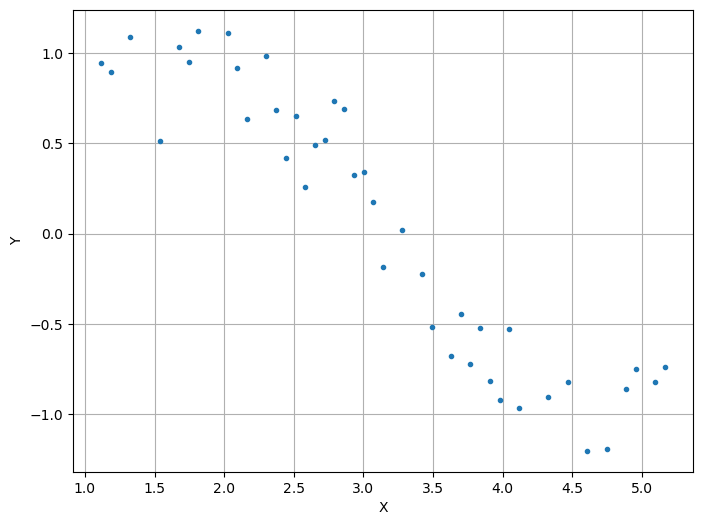

In [327]:
rcParams['figure.figsize'] = 8, 6
np.set_printoptions(precision=3)
np.random.seed(39)
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0,0.2,len(X))
# train-test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=42)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
# visualize training data
plt.plot(X_tr,y_tr,'.')

### Polynomial Regression Function

In [328]:
def linear_regression(X_train, y_train, X_test, y_test, power, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = power)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_train[:,np.newaxis], y_train)

    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])

    # MSE and RSS
    #Call the mean_squared_error function from sklearn.metrics
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # Plot
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('Plot for power: %d'%power)

    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

             train_mse test_mse
model_pow_1      0.081    0.098
model_pow_2      0.081    0.098
model_pow_3      0.033    0.079
model_pow_4      0.032    0.074
model_pow_5      0.031    0.073
model_pow_6      0.031    0.073
model_pow_7      0.031    0.073
model_pow_8      0.031    0.074
model_pow_9       0.03    0.075
model_pow_10     0.026      0.1
model_pow_11     0.024     0.17
model_pow_12     0.024     0.15
model_pow_13     0.024     0.15
model_pow_14     0.024     0.16
model_pow_15     0.023     0.19


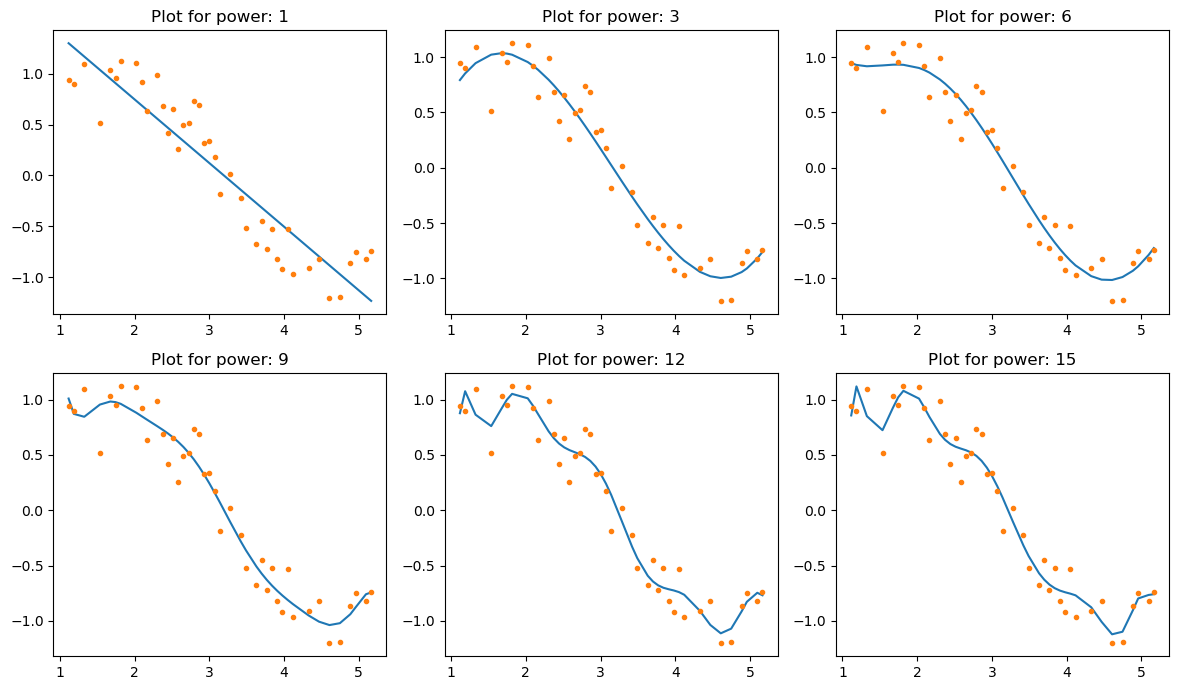

In [329]:
#Initialize a dataframe called coef_matrix_simple to store the results:
fig=plt.figure(figsize = (12,7))
col = ['train_mse','test_mse', 'train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
#If you want, this can also be a list - adjust your fxn definition accordingly
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers (1 - 16) and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+5] = linear_regression(X_tr, y_tr, X_te, y_te, power=i, models_to_plot=models_to_plot)

# print result matrix
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_simple[['train_mse','test_mse']])   # We display the train + test RSS columns of our dataframe

#### Plotting Train and Test MSE

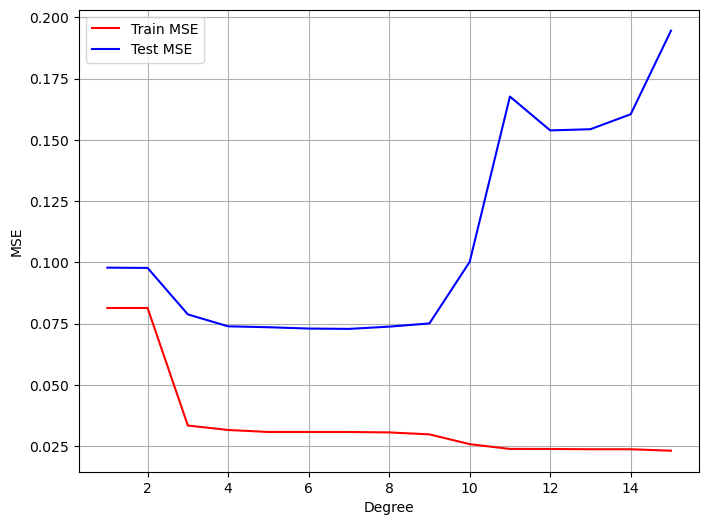

In [330]:
# evenly sampled time at 200ms intervals
poly_deg = np.arange(1,16)
# Red = train RSS; Blue = test RSS
plt.plot(poly_deg, coef_matrix_simple['train_mse'], 'r', label='Train MSE')
plt.plot(poly_deg, coef_matrix_simple['test_mse'], 'b',label='Test MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

### Ridge Regression Function 

In [331]:
def ridge_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = 15)
    ridge = Ridge(alpha=_lambda)                    #Note here that we use a ridge regression estimator
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",ridge)])
    pipeline.fit(X_train[:,np.newaxis], y_train)

    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])

    # MSE and RSS
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # plot
    if _lambda in models_to_plot:
        plt.subplot(models_to_plot[_lambda])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('lambda: %.3g'%_lambda)

    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

              train_mse test_mse
lambda_1e-15      0.024    0.096
lambda_1e-10      0.023     0.17
lambda_1e-08      0.024    0.097
lambda_0.0001     0.026    0.077
lambda_0.001      0.026    0.075
lambda_0.01       0.028    0.075
lambda_1          0.029    0.076
lambda_5          0.029    0.075
lambda_10         0.029    0.074
lambda_20         0.029    0.074


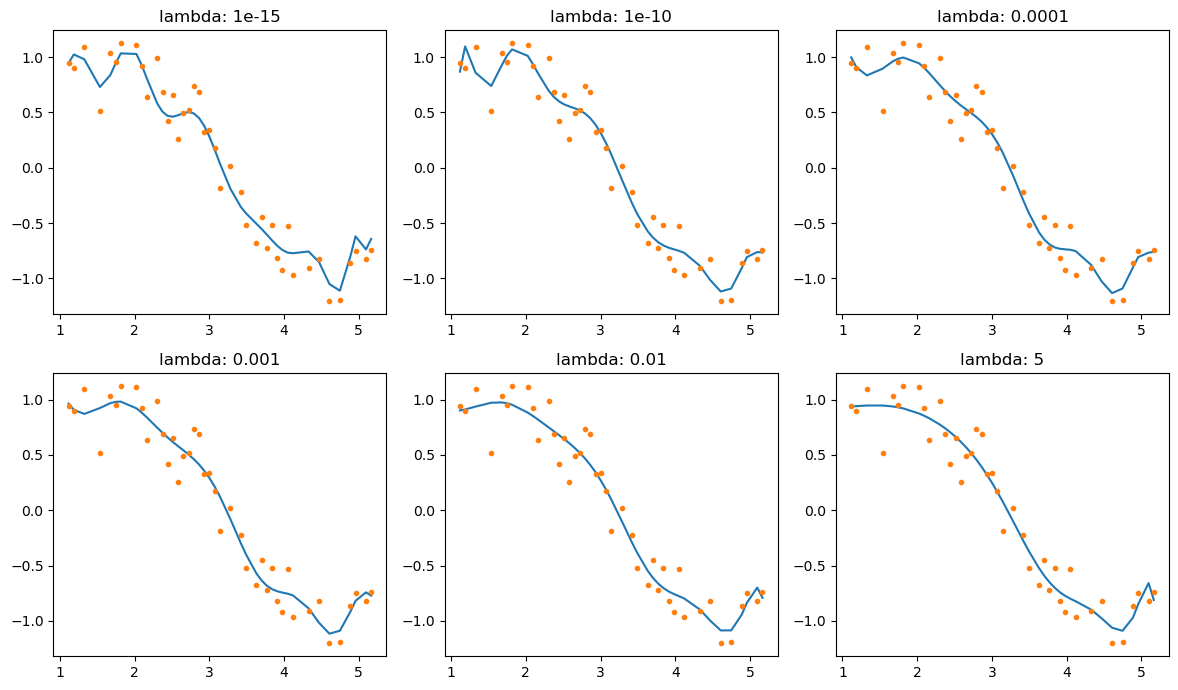

In [332]:
# Set the different values of alpha to be tested
fig=plt.figure(figsize = (12,7))
lambda_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients.
col = ['train_mse','test_mse','train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['lambda_%.2g'%lambda_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

#Iterate through all powers and assimilate results
for i in range(len(lambda_ridge)):
    coef_matrix_ridge.iloc[i,:20] = ridge_regression(X_tr, y_tr, X_te, y_te, _lambda=lambda_ridge[i], models_to_plot=models_to_plot)

# Print result matrix
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_ridge[['train_mse','test_mse']])

In [333]:
coef_matrix_ridge

,train_mse,test_mse,train_rss,test_rss,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15
lambda_1e-15,0.024,0.096,0.99,1.7,-1.2e+04,9.7e+04,-3.4e+05,7.1e+05,-9.7e+05,9.3e+05,-6.5e+05,3.4e+05,-1.3e+05,4e+04,-9e+03,1.5e+03,-1.8e+02,14,-0.68,0.015
lambda_1e-10,0.023,0.17,0.97,3,-1.2e+03,3.6e+03,-2.4e+03,-2.5e+03,3.9e+03,4.3e+02,-4.9e+03,5.2e+03,-3.1e+03,1.2e+03,-3.4e+02,66,-8.9,0.79,-0.042,0.001
lambda_1e-08,0.024,0.097,1,1.7,-2.4e+02,5.8e+02,-2.8e+02,-3.4e+02,2.5e+02,2.2e+02,-2.7e+02,2.7,1.4e+02,-1.1e+02,43,-11,1.8,-0.18,0.011,-0.00029
lambda_0.0001,0.026,0.077,1.1,1.4,4.7,-1.3,-2.8,-2.1,0.92,3,0.98,-2.8,-1.1,3.5,-2.4,0.89,-0.19,0.026,-0.0019,6e-05
lambda_0.001,0.026,0.075,1.1,1.4,4,-1.6,-2.1,-1,0.95,1.9,0.39,-1.8,-0.63,2.2,-1.6,0.6,-0.13,0.018,-0.0013,4.2e-05
lambda_0.01,0.028,0.075,1.2,1.4,1.4,-0.38,-0.44,-0.14,0.31,0.46,0.018,-0.51,-0.11,0.62,-0.47,0.18,-0.042,0.0056,-0.00042,1.3e-05
lambda_1,0.029,0.076,1.2,1.4,0.85,0.0067,0.016,0.025,0.026,0.011,-0.013,-0.024,-0.00028,0.023,-0.014,0.0031,3.9e-05,-0.00013,2.1e-05,-1.1e-06
lambda_5,0.029,0.075,1.2,1.3,0.9,0.0027,0.0064,0.0098,0.011,0.0065,-0.002,-0.0087,-0.0048,0.0058,0.0026,-0.0042,0.0018,-0.00039,4.1e-05,-1.7e-06
lambda_10,0.029,0.074,1.2,1.3,0.92,0.0018,0.0042,0.0065,0.0072,0.0046,-0.0012,-0.0062,-0.0042,0.004,0.0031,-0.004,0.0017,-0.00035,3.7e-05,-1.6e-06
lambda_20,0.029,0.074,1.2,1.3,0.94,0.0011,0.0026,0.004,0.0044,0.0029,-0.00076,-0.0043,-0.0034,0.0024,0.0033,-0.0037,0.0015,-0.00032,3.3e-05,-1.4e-06


In [334]:
def Ridge_regression_weight(X, Y, lambda_,degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    weights = []
    for alpha in lambda_:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_poly, Y)
        weights.append(ridge.coef_)
    
    weights = np.array(weights)

    for i in range(len(lambda_)):
        plt.plot(range(1,degree+2),weights[i],label='lambda='+str(lambda_[i])) 
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

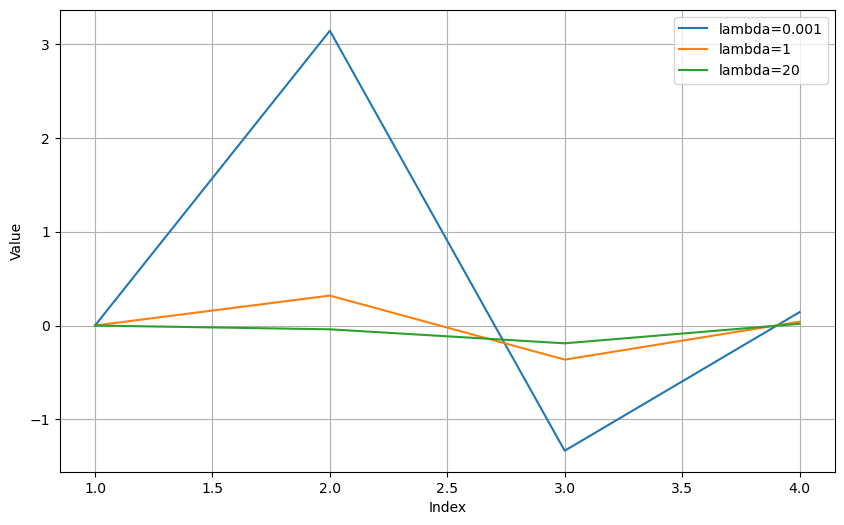

In [335]:
plt.figure(figsize=(10, 6))
lambda_ = [1e-3,1,20]
Ridge_regression_weight(X, y, lambda_,3)

#### Plotting Train and Test MSE

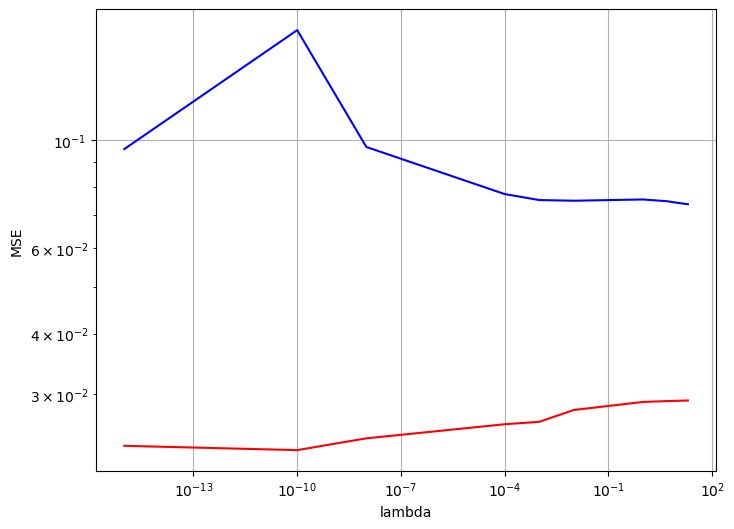

In [336]:
# Red = train RSS; Blue = Test RSS
plt.plot(lambda_ridge, coef_matrix_ridge['train_mse'], 'r', lambda_ridge, coef_matrix_ridge['test_mse'], 'b')
# Why do we adjust the scale displayed here?
plt.xscale("log")
plt.yscale("log")
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Lasso Regression Function 

In [337]:
def Lasso_regression(X_train, y_train, X_test, y_test, _lambda, models_to_plot):
    # Use Polynomial features and pipeline to fit data
    poly_features = PolynomialFeatures(degree = 15)
    lasso = Lasso(alpha=_lambda)                    #Note here that we use a lasso regression estimator
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lasso)])
    pipeline.fit(X_train[:,np.newaxis], y_train)

    # Get predication with the model trained with pipeline
    pred_train = pipeline.predict(X_train[:,np.newaxis])
    pred_test = pipeline.predict(X_test[:,np.newaxis])

    # MSE and RSS
    train_mse = mean_squared_error(y_train,pred_train)
    test_mse = mean_squared_error(y_test,pred_test)
    train_rss = sum((y_train - pred_train) ** 2)
    test_rss = sum((y_test - pred_test) ** 2)

    # plot
    if _lambda in models_to_plot:
        plt.subplot(models_to_plot[_lambda])
        plt.tight_layout()
        plt.plot(X_train[X_train.argsort()], pred_train[X_train.argsort()])
        plt.plot(X_train, y_train,'.')
        plt.title('lambda: %.3g'%_lambda)

    ret = [train_mse, test_mse, train_rss, test_rss]
    ret.extend([pipeline.steps[1][1].intercept_])
    ret.extend(pipeline.steps[1][1].coef_[1:])
    return ret

              train_mse test_mse
lambda_1e-15      0.031    0.076
lambda_1e-10      0.031    0.076
lambda_1e-08      0.031    0.076
lambda_0.0001     0.031    0.076
lambda_0.001      0.031    0.075
lambda_0.01       0.033    0.072
lambda_1          0.033    0.078
lambda_5          0.034    0.087
lambda_10         0.038    0.097
lambda_20         0.041      0.1


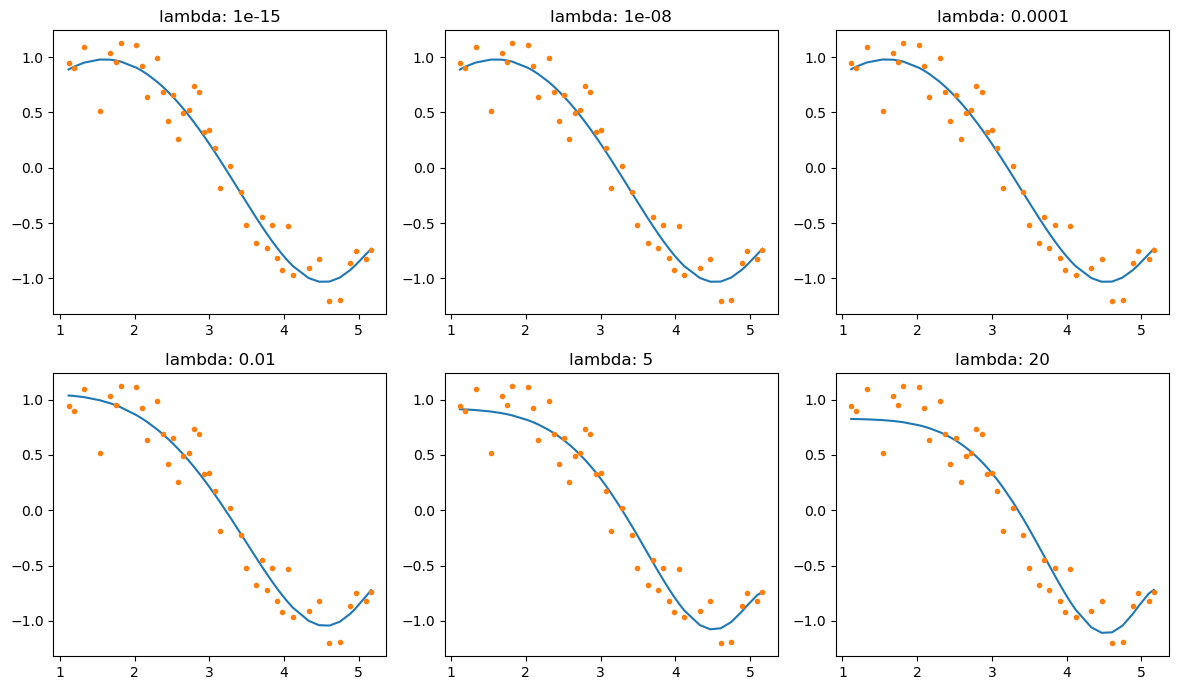

In [338]:
# Set the different values of alpha to be tested
fig=plt.figure(figsize = (12,7))
lambda_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients.
col = ['train_mse','test_mse','train_rss','test_rss'] + ['w%d'%i for i in range(16)]
ind = ['lambda_%.2g'%lambda_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-8:232, 1e-4:233, 1e-2:234, 5:235, 20:236}

#Iterate through all powers and assimilate results
for i in range(len(lambda_lasso)):
    coef_matrix_lasso.iloc[i,:20] = Lasso_regression(X_tr, y_tr, X_te, y_te, _lambda=lambda_lasso[i], models_to_plot=models_to_plot)

# Print result matrix
pd.options.display.float_format = '{:,.2g}'.format
print(coef_matrix_lasso[['train_mse','test_mse']])

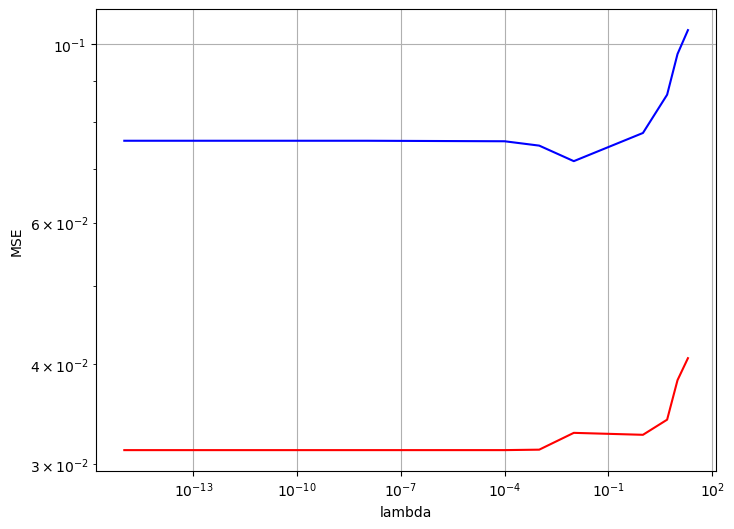

In [339]:
plt.plot(lambda_lasso, coef_matrix_lasso['train_mse'], 'r', lambda_lasso, coef_matrix_lasso['test_mse'], 'b')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

In [340]:
def Lasso_regression_weight(X, Y, lambda_, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    weights = []

    for alpha in lambda_:
        ridge = Lasso(alpha=alpha)
        ridge.fit(X_poly, Y)
        weights.append(ridge.coef_)

    weights = np.array(weights)

    for i in range(len(lambda_)):
        plt.plot(range(1,degree+2),weights[i],label='lambda='+str(lambda_[i]))
        
    plt.xlabel('Weights_index')
    plt.ylabel('Weight_value')
    plt.legend()
    plt.grid(True)
    plt.show()

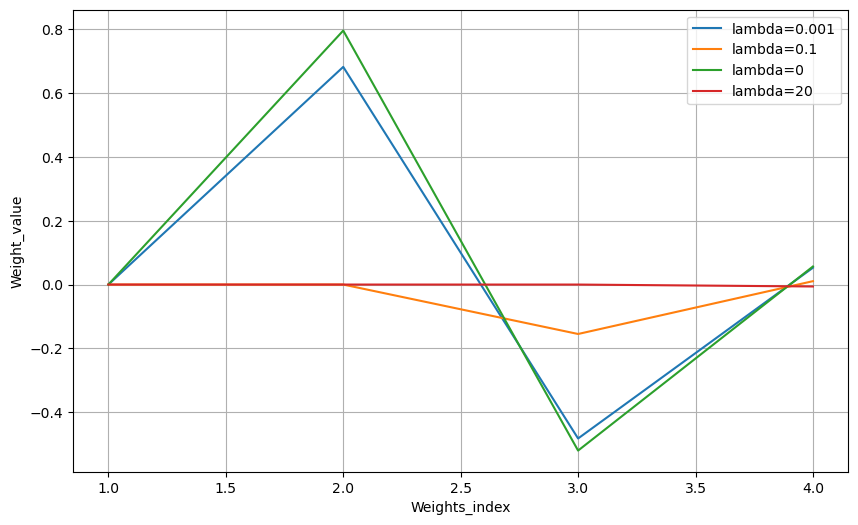

In [341]:
plt.figure(figsize=(10, 6))
lambda_ = [1e-3,0.1,0,20]
Lasso_regression_weight(X, y, lambda_,3)